In [1]:
import os, csv, itertools
import pandas as pd

In [2]:
md = pd.read_csv("./helper_data/Tabla de metadatos.csv")

In [3]:
def dgea(gse, trt_names, ctrl_names):
 
    path = f"./sources_formated/{gse}.csv"
    cnt_mtx = pd.read_csv(path, index_col=0)
    cnt_mtx = cnt_mtx[trt_names+ctrl_names]
    cnt_mtx.index.name = None
    cnt_mtx.to_csv("./dseq/counts_data.csv")
    
    sample_md = pd.DataFrame()
    sample_md.index = cnt_mtx.columns
    for sample in sample_md.index:
        sample_md.loc[sample, 'condition'] = "treated" if sample in trt_names else "untreated"
    sample_md.index.name = None
    sample_md.index = [idx.replace("-", ".") for idx in sample_md.index]
    sample_md.to_csv("./dseq/sample_md.csv")
    
    import subprocess
    subprocess.call("/usr/bin/Rscript --vanilla /mnt/e/Collage/BioTech/Analisis_Genes/dynamic_app/dseq/rscript.R", shell=True)



In [4]:
# filter by query
smpls = md[md["Genero"] == "Femenino"]

# get biological replicates
bio_repls = set(smpls["Id muestra biologica"])
bio_trt_ids = [r for r in bio_repls if str(r) != 'nan' and r[-1]!='0']

# separate biological replicates
for trt_id in bio_trt_ids:
    # Get treated column names of counts matrix
    trt_smpls = smpls[smpls["Id muestra biologica"] == trt_id]
    trt_smpls_names = list(trt_smpls["Nombre"])
    
    # Get control column names of counts matrix
    ctrl_id = trt_id
    ctrl_id = ctrl_id[:-1] + '0'
    ctrl_smpls = smpls[smpls["Id muestra biologica"] == ctrl_id]
    ctrl_smpls_names = list(ctrl_smpls["Nombre"])
    
    # Get GSE id
    gse = trt_id.split('_')[0]
    
dgea(gse=gse, trt_names=trt_smpls_names, ctrl_names=ctrl_smpls_names)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package: GenomeInfoDb
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loadi

[1] TRUE
[1] TRUE


Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1623 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


null device 
          1 


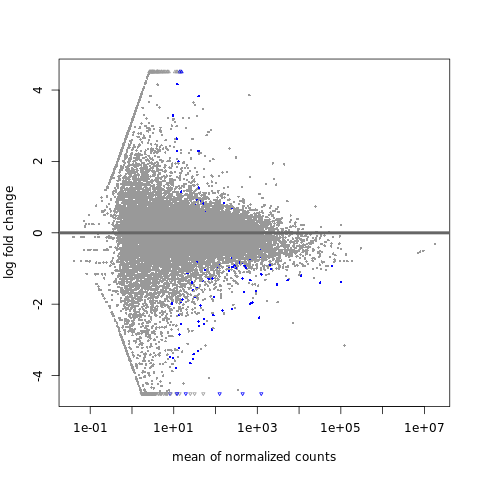

In [8]:
from IPython.display import Image
Image(filename='dseq/saving_plot1.png') 